<a href="https://colab.research.google.com/github/dannynurdin/jupyter-notebook-me/blob/master/Image%20Classification%20-%20Dog%20vs%20Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT DATASET FROM KAGGLE**

In [36]:
# !pip install kaggle

In [37]:
# from google.colab import files
# files.upload()

In [38]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json

In [39]:
!kaggle datasets download -d chetankv/dogs-cats-images

dogs-cats-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
# from zipfile import ZipFile
# file_name = "dogs-cats-images.zip"

# with ZipFile(file_name, 'r') as zip:
#   zip.extractall()
#   print("Success")

# **IMPORT LIBRARY**

In [41]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# **IMAGE PRE-PROCESSING**

In [42]:
train_dir = '/content/dog vs cat/dataset/training_set'

In [43]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    brightness_range=[0.2,1.0],
                    zoom_range=[0.5,1.0],
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split = 0.2
)

In [44]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 200),
    shuffle = True,
    batch_size = 32,
    subset = 'training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 200),
    shuffle = True,
    batch_size = 32,
    subset = 'validation'
)

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


# **MODEL**

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=train_generator.image_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(126, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.15),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.15),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(2, activation='softmax')

    ################################   

    # tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=train_generator.image_shape),
    # tf.keras.layers.MaxPooling2D(2, 2),

    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),

    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),

    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),

    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.2),
    
    # tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 198, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 99, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 74, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 48, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 36, 48, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 46, 126)      

In [46]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# **CALLBACKS**

**Callback 1**

In [63]:
class myCallback1(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8):
      if(logs.get('val_accuracy')>0.8):
        print("\nAkurasi telah mencapai >80%!")
      self.model.stop_training = True
callbacks1 = myCallback1()

**Callback 2**

In [48]:
class myCallback2(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      if(logs.get('val_accuracy')>0.85):
        print("\nAkurasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks2 = myCallback2()

# **TRAINING 1**

In [64]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  
      epochs=150,
      validation_data=val_generator, 
      validation_steps=5,  
      verbose=1,
      callbacks = [callbacks1])

Epoch 1/150
100/100 [==============================] - 32s 315ms/step - loss: 0.4527 - accuracy: 0.7903 - val_loss: 0.5726 - val_accuracy: 0.7250
Epoch 2/150
100/100 [==============================] - ETA: 0s - loss: 0.4331 - accuracy: 0.8025
Akurasi telah mencapai >80%!
100/100 [==============================] - 31s 311ms/step - loss: 0.4331 - accuracy: 0.8025 - val_loss: 0.3886 - val_accuracy: 0.8125


last accuration of validation test :  0.8125
last accuration of train test      :  0.8025000095367432
last loss of validation loss       :  0.38859134912490845
last loss of train loss            :  0.43308016657829285


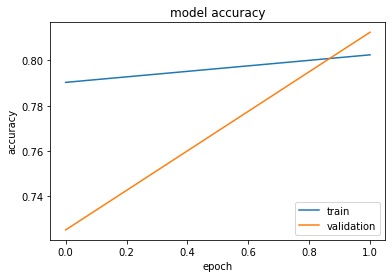

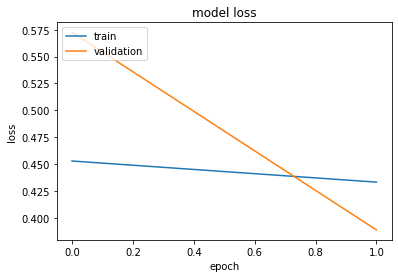

In [65]:
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('last accuration of validation test : ', val_acc[-1])
print('last accuration of train test      : ', train_acc[-1])
print('last loss of validation loss       : ', val_loss[-1])
print('last loss of train loss            : ', loss[-1])


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **TF-Lite**

In [66]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmplov5_vr0/assets


INFO:tensorflow:Assets written to: /tmp/tmplov5_vr0/assets


In [67]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)